In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

np.random.seed(51)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

In [3]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
df = df.drop(columns=['id', 'exame_33'])


In [5]:
X = df.drop(columns='diagnostico')
y = df['diagnostico'].map({'M': 1, 'B' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [7]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
predicted = dummy.predict(X_test)
d_accuracy = accuracy_score(y_test, predicted)

In [8]:
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 95.1048951048951%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [9]:
scaler = StandardScaler()
scaler.fit(df.drop(columns='diagnostico'))
scaled = scaler.transform(df.drop(columns='diagnostico'))

In [10]:
df_scaled = pd.DataFrame(scaled, columns=df.drop(columns='diagnostico').columns)

In [11]:
df_scaled = pd.concat([df['diagnostico'], df_scaled], axis=1)

In [12]:
df_plot = pd.melt(df_scaled, id_vars='diagnostico', var_name='exames', value_name='valores')
df_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


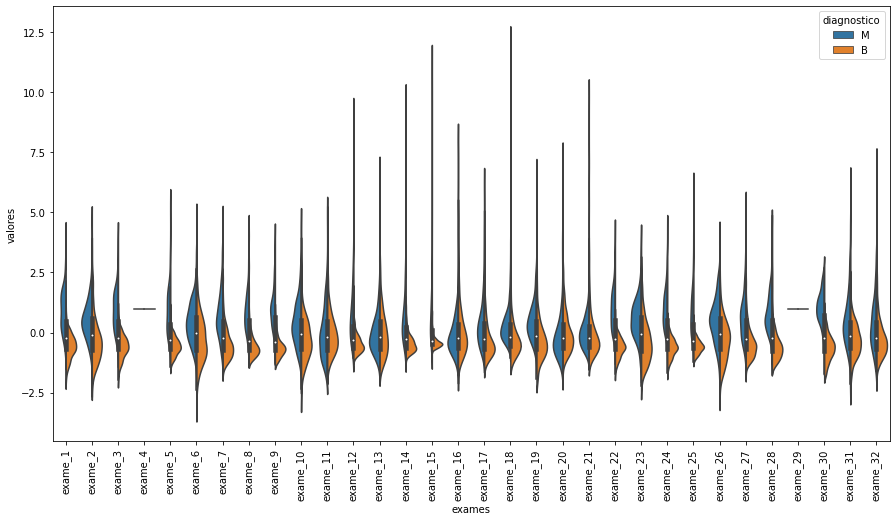

In [13]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=df_plot, split=True);

In [14]:
X = df.drop(columns=['diagnostico', 'exame_4', 'exame_29'])
y = df['diagnostico'].map({'M': 1, 'B' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 94.4055944055944%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [15]:
matrix_cor = df.drop(columns=['diagnostico', 'exame_4', 'exame_29']).corr()

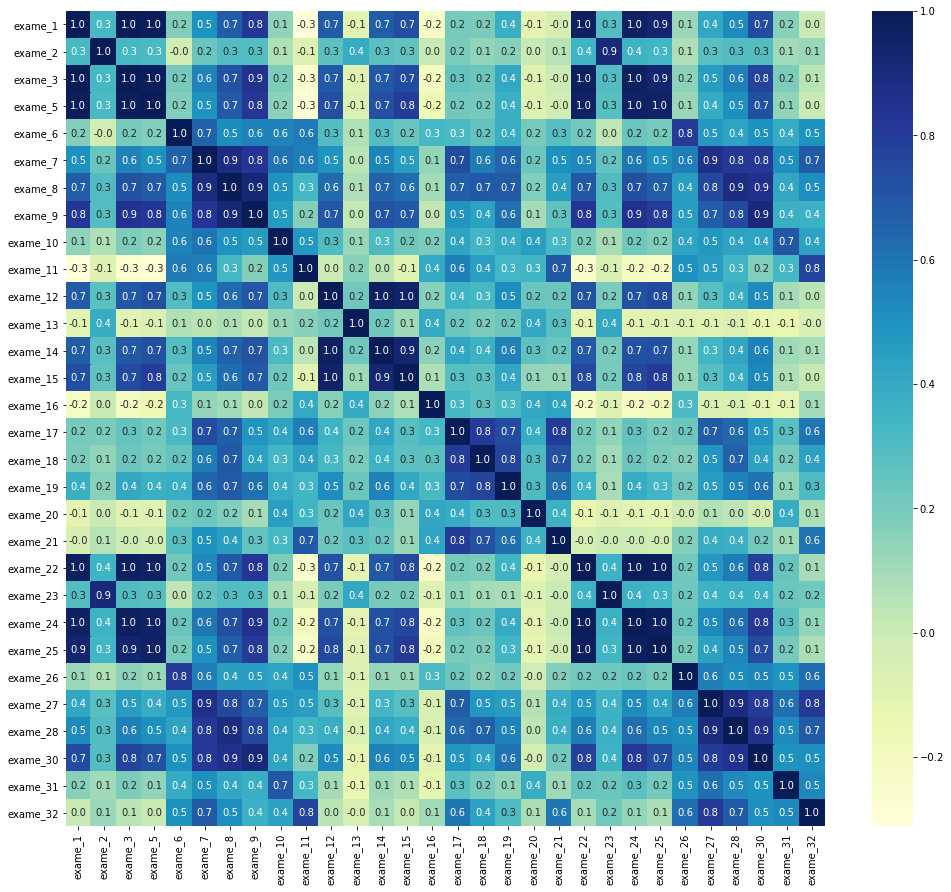

In [16]:
plt.figure(figsize=(17,15))
sns.heatmap(matrix_cor, annot=True, fmt='.1f', cmap="YlGnBu");

In [17]:
matrix_cor = matrix_cor[matrix_cor > 0.99]

In [18]:
matrix_cor_s = matrix_cor.sum()

In [19]:
matrix_cor_s = matrix_cor_s[matrix_cor_s > 1]

In [20]:
matrix_cor_s

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [21]:
X = df.drop(columns=['diagnostico', 'exame_4', 'exame_29', 'exame_3', 'exame_24'])
y = df['diagnostico'].map({'M': 1, 'B' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 97.2027972027972%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [22]:
skb = SelectKBest(chi2, k = 5)

In [23]:
skb.fit(X_train, y_train)
X_train = skb.transform(X_train)
X_test = skb.transform(X_test)

In [24]:
X_train.shape

(426, 5)

In [25]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 91.6083916083916%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [26]:
predicted = model.predict(X_test)

In [27]:
matx_conf = confusion_matrix(y_test, predicted)

In [28]:
matx_conf

array([[91,  6],
       [ 6, 40]])

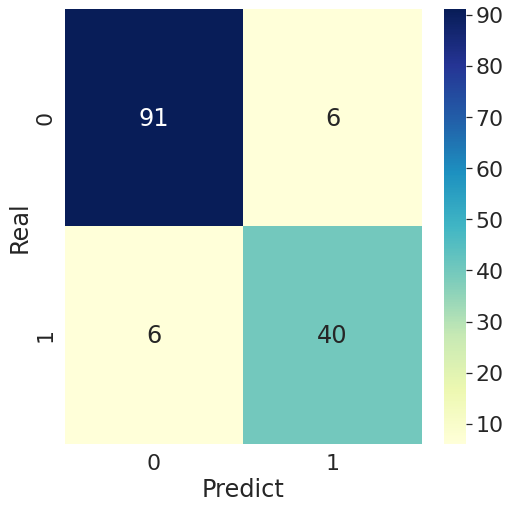

In [29]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(matx_conf, annot=True, cmap="YlGnBu").set(xlabel='Predict', ylabel='Real');

In [30]:
X = df.drop(columns=['diagnostico', 'exame_4', 'exame_29', 'exame_3', 'exame_24'])
y = df['diagnostico'].map({'M': 1, 'B' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 96.5034965034965%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [31]:
srfe = RFE(model, n_features_to_select=5, step=1)
srfe.fit(X_train, y_train)
X_train = srfe.transform(X_train)
X_test = srfe.transform(X_test)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 94.4055944055944%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


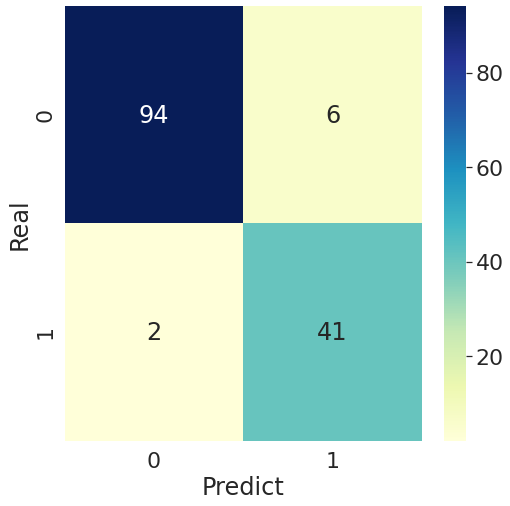

In [32]:
predicted = model.predict(X_test)
matx_conf = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(matx_conf, annot=True, cmap="YlGnBu").set(xlabel='Predict', ylabel='Real');

In [33]:
X = df.drop(columns=['diagnostico', 'exame_4', 'exame_29', 'exame_3', 'exame_24'])
y = df['diagnostico'].map({'M': 1, 'B' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')


RandomForestClassifier(): 96.5034965034965%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


In [34]:
srfecv = RFECV(model, cv=5, step=1, scoring='accuracy')
srfecv.fit(X_train, y_train)
X_train = srfecv.transform(X_train)
X_test = srfecv.transform(X_test)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'{model}: {accuracy*100}%\n{dummy}: {d_accuracy*100}%')

RandomForestClassifier(): 96.5034965034965%
DummyClassifier(strategy='most_frequent'): 65.73426573426573%


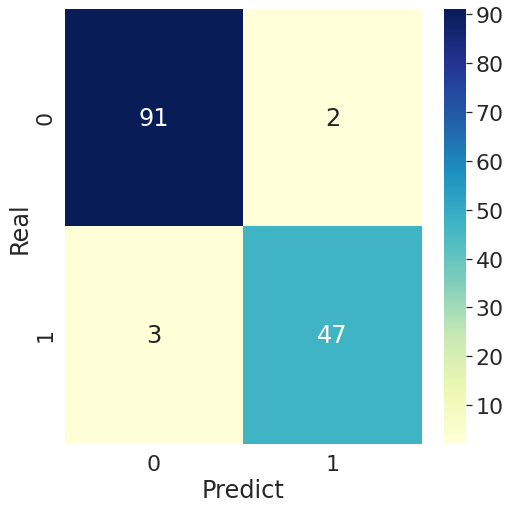

In [35]:
predicted = model.predict(X_test)
matx_conf = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(matx_conf, annot=True, cmap="YlGnBu").set(xlabel='Predict', ylabel='Real');

In [36]:
srfecv.n_features_

14

In [37]:
pca = PCA(n_components=2)
pca_v = pca.fit_transform(df.drop(columns='diagnostico'))

In [38]:
pca_v

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

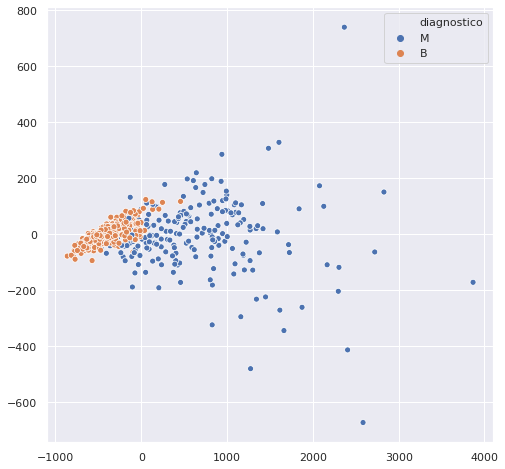

In [43]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
sns.scatterplot(x=pca_v[:,0], y=pca_v[:,1], hue=df['diagnostico']);